classification categories

- binary classification (categorize email spam or not, 1 or 0)
- multiclass classification (example: food recognition in photo, up to 1000 classes)
- multilabel classification (example: one website with multiple labels (wikipedia))


* architecture of a neural network classification model
* input shapes and output shapes of a classification model (features and labels)
* creating custom data to view, fit on and predict on
* modeling steps
  - creating a model
  - setting a loss function
  - setting an optimizer
  - creating a training loop
  - evaluating the model

* saving and loading models
* harnessing the power of non-linearity
* different classification evaluation methods


**Architecture of a classification model**

Hyperparameters

- Input layer shape
- Hidden layers
- Neurons per hidden layer
- Output layer shape
- Hidden layer activation
- Output activation
- Loss function
- Optimizer

https://docs.pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html

classification is a problem of predicting whether something is one thing or the another

## 1. Make classification data and get it ready

In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles
# make 1000 samples
n_samples = 1000

# create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [5]:
# make dataframe of circles data
import pandas as pd
circles = pd.DataFrame({'X1': X[:, 0],
                        'X2': X[:, 1],
                        'label': y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [6]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

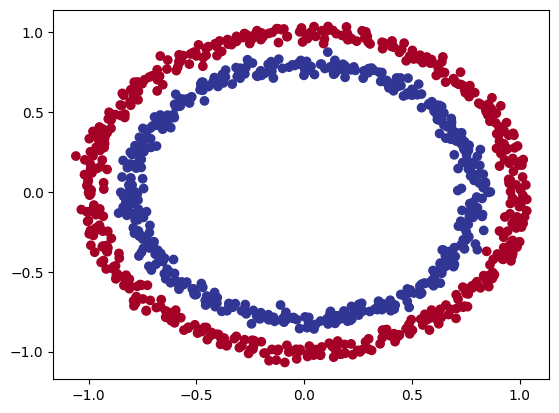

In [7]:
# visualize with matplotlib
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu); # c map !!!! red yellow blue !!!

## 1.1 Check input - output - shapes

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [10]:
# view example of features and labels
x_sample = X[0]
y_sample = y[0]

print(f"Values for sample X: {x_sample} , Values for sample y: {y_sample}")
print(f"Shapes for sample X: {x_sample.shape} , Shapes for sample y: {y_sample.shape}")

Values for sample X: [0.75424625 0.23148074] , Values for sample y: 1
Shapes for sample X: (2,) , Shapes for sample y: ()


## 1.2 Turning data into tensors, create training and test split

In [11]:
import torch
torch.__version__

'2.0.0'

In [12]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [13]:
# turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [14]:
type(X), X.dtype # to work with these in pytorch the change has to be made from the numpy default 64 to torch float 32 (default datatype in pytorch)

(torch.Tensor, torch.float32)

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [15]:
# split data into data into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,   # 20% test 80% train data
                                                    random_state=42  # similar to random seed in pytorch, r_s effects sklearn
                                                    )

In [16]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. building a model

model for classification

1. setting up device agnostic code
2. construct model nn.Module
3. Define a loss function
4. Create a training and test loop

In [17]:
import torch
from torch import nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device


'cpu'

In [18]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

1. subclass nn.Module
2. Create 2 nn.Linear() Layers for data handling
3. define forward() method
4. Make an  instance of the model class and send it to target device

In [19]:
X_train.shape

torch.Size([800, 2])

In [20]:
# 1. construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. create 2 linear layers
    self.linear_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 features

    self.linear_2 = nn.Linear(in_features=5, out_features=1) # have to match up with the out features of the previous layer, outputs a single feature (same shape as y)

  # 3. define a forward method tht outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

  # 4. instantiate an instance of the model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0


CircleModelV0(
  (linear_1): Linear(in_features=2, out_features=5, bias=True)
  (linear_2): Linear(in_features=5, out_features=1, bias=True)
)

https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.74477&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

In [21]:
next(model_0.parameters())

Parameter containing:
tensor([[ 0.2618, -0.3786],
        [ 0.1718, -0.5422],
        [-0.5506, -0.0908],
        [ 0.0414,  0.3294],
        [-0.3530, -0.1539]], requires_grad=True)

In [22]:
# replicate model using nn.Sequentail()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=128),
    nn.GELU(),
    nn.Linear(in_features=128, out_features=256),
    nn.GELU(),
    nn.Linear(in_features=256, out_features=128),
    nn.GELU(),
    nn.Linear(in_features=128, out_features=1)
)

model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.5362,  0.2772],
                      [ 0.6034, -0.3226],
                      [ 0.2668,  0.1302],
                      [-0.0916, -0.6801],
                      [ 0.3340,  0.5769],
                      [ 0.6696, -0.2004],
                      [ 0.6126,  0.0829],
                      [-0.4234, -0.3822],
                      [-0.5667,  0.0821],
                      [-0.5386, -0.2214],
                      [-0.6052, -0.5545],
                      [ 0.4058,  0.1279],
                      [-0.0155,  0.6479],
                      [ 0.3966, -0.3013],
                      [ 0.4043,  0.6366],
                      [ 0.4456, -0.4499],
                      [ 0.2548, -0.1680],
                      [ 0.0477, -0.6353],
                      [ 0.0669,  0.6137],
                      [ 0.6006, -0.0867],
                      [ 0.5936, -0.4819],
                      [-0.5208,  0.4865],
                      [-0.1116, -0.0351],
        

In [23]:
# make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 lbels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[-0.0300],
        [-0.0251],
        [-0.0470],
        [-0.0253],
        [-0.0595],
        [-0.0576],
        [-0.0355],
        [-0.0442],
        [-0.0467],
        [-0.0248]])

First 10 lbels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [24]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### 2.1 setup of loss function and optimizer

chose loss function and optimiizer

for **regression** MAE or MSE (mean absolut error, mean squared error)

for **classification** use binary cross entropy or categorial cross entropy (cross entropy)

loss function measures how wrong the predictions of the model are

Note: logits layer feeds into the softmaw for normalization

for **optimizers** common ones are SGD and Adam

* common choices for optimizers and loss function https://docs.pytorch.org/docs/stable/optim.html, https://docs.pytorch.org/docs/stable/nn.html

* loss function torch.nn.BECWithLogitsLoss()

https://docs.pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html
https://docs.pytorch.org/docs/stable/torch.html

In [25]:
# setup loss function
# loss_fn = nn.BCELoss() # requires inputs that have gone through the sigmoid activation function prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss has sigmoid activation function build-in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [26]:
# claculate accuracy - from 100 times how often does the model get right
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

## 3.1 Train model

* forward pass
* calculate loss
* optimizer zero grad
* loss backward (backpropagation)
* optimizer step (gradient descent)

from raw logits -> prediction probabilities -> prdediction labels

convertion from **logits** to **prediction probablilities** through activation function (**commonly sigmoid for binary and softmax for multiclass**)

after that convert the model prediction probabilities to prediction labels by either rounding or takinfg **argmax**

In [27]:
# view first 5 outputs of forward test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0300],
        [-0.0251],
        [-0.0470],
        [-0.0253],
        [-0.0595]])

y_pred_probs >= 0.5, y = 1 (class 1)

y_pred_probs < 0.5, y = 0 (class 0)

In [28]:
# use sigmoid activation function, turn logits into probablities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4925],
        [0.4937],
        [0.4883],
        [0.4937],
        [0.4851]])

In [29]:
# find predicted labels
y_preds = torch.round(y_pred_probs)

# logits -> pred probs -> pred labels
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 0.])

### 3.2 building training and test loop

In [30]:
torch.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_0.train()

  # 1. forward pass
  y_logits = model_0(X_train).squeeze() # removing extra dimension
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

  # 2. calculate the loss/accuracy
  # loss = loss_fn(torch.sigmoid(y_logits), # nn.BCELoss expects prediction probabilities as input
  #               y_train)

  loss = loss_fn(y_logits,  # nn.BCEWithLogitsLoss expects raw logits as input
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. loss backward (backpropagation)
  loss.backward()

  # 5. optimizer step (gradient descent)
  optimizer.step()

  ### testing
  model_0.eval()
  with torch.inference_mode():
    # 1. forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. calculate test loss/accuracy
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
    # print out
    if epoch % 10 == 0:
      print(f"Number of Epoch: {epoch} | Loss: {loss:.5f} Accuracy: {acc:.2f} | Test Loss: {test_loss:.5f} Test Accuracy: {test_acc:.2f}")

Number of Epoch: 0 | Loss: 0.69311 Accuracy: 50.00 | Test Loss: 0.69352 Test Accuracy: 50.00
Number of Epoch: 10 | Loss: 0.69287 Accuracy: 50.00 | Test Loss: 0.69330 Test Accuracy: 50.00
Number of Epoch: 20 | Loss: 0.69268 Accuracy: 50.00 | Test Loss: 0.69314 Test Accuracy: 50.00
Number of Epoch: 30 | Loss: 0.69251 Accuracy: 46.62 | Test Loss: 0.69299 Test Accuracy: 44.50
Number of Epoch: 40 | Loss: 0.69235 Accuracy: 49.62 | Test Loss: 0.69285 Test Accuracy: 49.50
Number of Epoch: 50 | Loss: 0.69219 Accuracy: 51.25 | Test Loss: 0.69271 Test Accuracy: 51.00
Number of Epoch: 60 | Loss: 0.69204 Accuracy: 52.50 | Test Loss: 0.69258 Test Accuracy: 51.50
Number of Epoch: 70 | Loss: 0.69188 Accuracy: 53.12 | Test Loss: 0.69245 Test Accuracy: 52.00
Number of Epoch: 80 | Loss: 0.69172 Accuracy: 53.87 | Test Loss: 0.69231 Test Accuracy: 52.00
Number of Epoch: 90 | Loss: 0.69156 Accuracy: 54.62 | Test Loss: 0.69217 Test Accuracy: 52.50
Number of Epoch: 100 | Loss: 0.69139 Accuracy: 54.87 | Test L

## 4. make predictions and evaluate model

https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py
https://madewithml.com/courses/foundations/neural-networks/

plot_decision_boundary()

In [31]:
import requests
from pathlib import Path
import matplotlib.pyplot as plt

# download helper function fro pytorch repo if not already downloaded
if Path('helper_function.py').is_file():
  print('helper_function.py already exists')
else:
  print('Download helper_function.py')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py')
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


Download helper_function.py


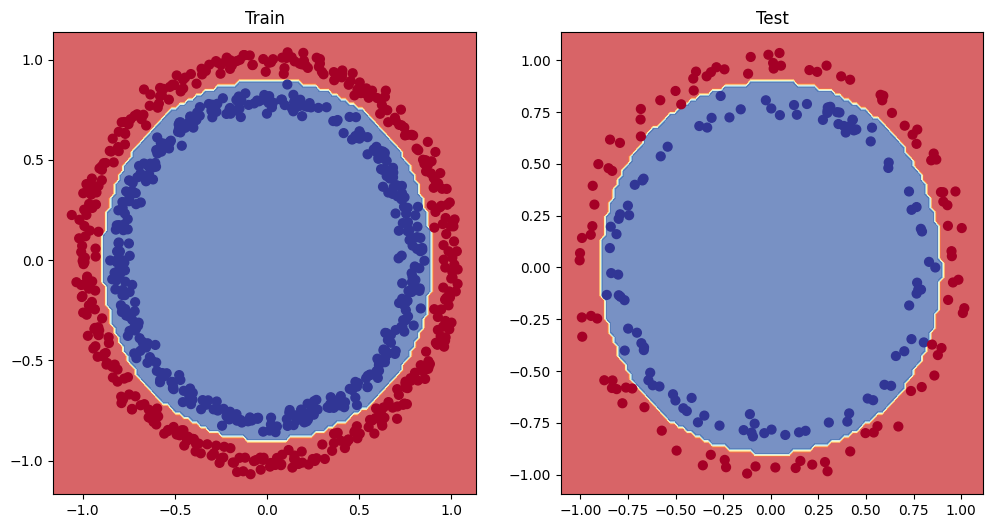

In [32]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_0, X_test, y_test)

In [33]:
X_train[:3], y_train[:3]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240]]),
 tensor([1., 0., 0.]))

In [34]:
X_train.shape, y_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [35]:
X_train.size(), y_train.size()

(torch.Size([800, 2]), torch.Size([800]))

In [36]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10) # -> initial input features depending all on shape of the model 2 in features 1 out feature
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x)))

In [37]:
model_1 = CircleModelV1()
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [38]:
# create new loss function
loss_fn = nn.BCEWithLogitsLoss()

# create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [39]:
torch.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                   y_test)
    test_acc = accuracy_fn(y_true=y_test,
                      y_pred=test_pred)
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} Loss: {loss:.5f} Acc: {acc:.2f} | Test Loss: {test_loss:.5f} Test Acc: {test_acc:.2f}")

Epoch: 0 Loss: 0.69396 Acc: 50.88 | Test Loss: 0.69261 Test Acc: 100.00
Epoch: 100 Loss: 0.69305 Acc: 50.38 | Test Loss: 0.69379 Test Acc: 100.00
Epoch: 200 Loss: 0.69299 Acc: 51.12 | Test Loss: 0.69437 Test Acc: 100.00
Epoch: 300 Loss: 0.69298 Acc: 51.62 | Test Loss: 0.69458 Test Acc: 100.00
Epoch: 400 Loss: 0.69298 Acc: 51.12 | Test Loss: 0.69465 Test Acc: 100.00
Epoch: 500 Loss: 0.69298 Acc: 51.00 | Test Loss: 0.69467 Test Acc: 100.00
Epoch: 600 Loss: 0.69298 Acc: 51.00 | Test Loss: 0.69468 Test Acc: 100.00
Epoch: 700 Loss: 0.69298 Acc: 51.00 | Test Loss: 0.69468 Test Acc: 100.00
Epoch: 800 Loss: 0.69298 Acc: 51.00 | Test Loss: 0.69468 Test Acc: 100.00
Epoch: 900 Loss: 0.69298 Acc: 51.00 | Test Loss: 0.69468 Test Acc: 100.00


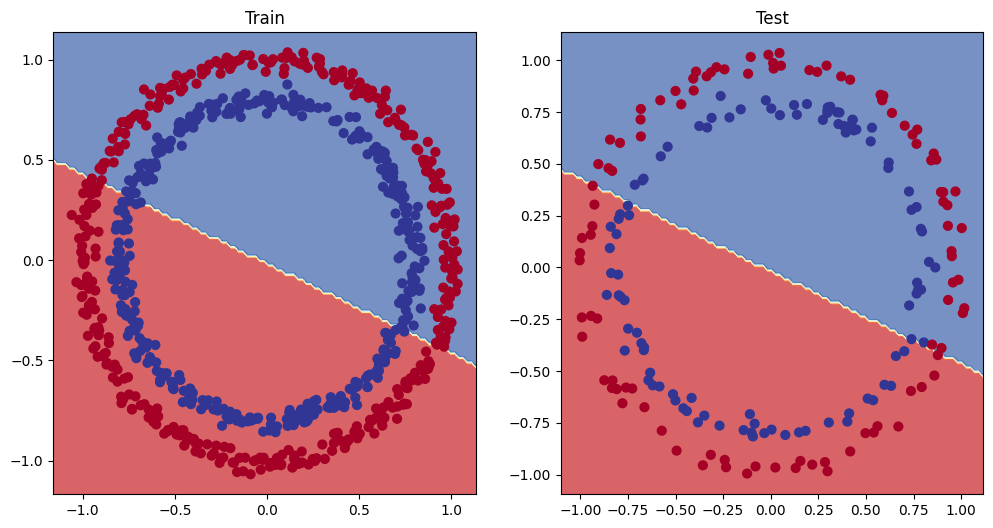

In [40]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_1, X_test, y_test)


### 5.1 preparing data to see if model can fit a straight line

* break down problem in smaler chunks

In [41]:
# create data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

# check data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [42]:
# create train and test split
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# check length
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

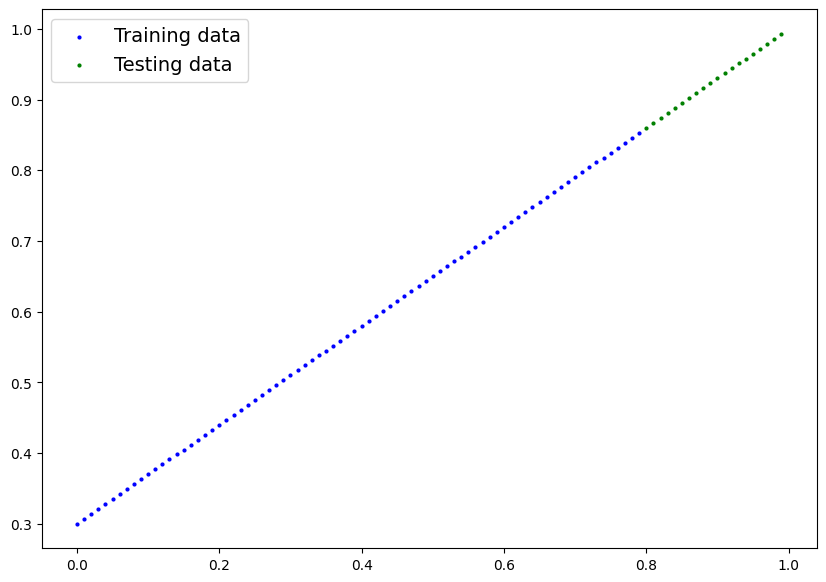

In [43]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression);

In [44]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

### 5.2 adjust model_1 to fit straight line

In [45]:
X_train_regression.shape, y_train_regression.shape

(torch.Size([80, 1]), torch.Size([80, 1]))

In [46]:
# using nn.Sequential
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=15),
    nn.Linear(in_features=15, out_features=15),
    nn.Linear(in_features=15, out_features=1)
).to(device)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=15, bias=True)
  (1): Linear(in_features=15, out_features=15, bias=True)
  (2): Linear(in_features=15, out_features=1, bias=True)
)

In [47]:
# loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

In [48]:
# train the model
torch.manual_seed(42)

X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

epochs = 10000

for epoch in range(epochs):
  model_2.train()

  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_preds = model_2(X_test_regression)
    test_loss = loss_fn(test_preds, y_test_regression)

    if epoch %1000 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")



Epoch: 0 | Loss: 1.18385 | Test Loss: 1.47037
Epoch: 1000 | Loss: 0.02333 | Test Loss: 0.00512
Epoch: 2000 | Loss: 0.01842 | Test Loss: 0.00332
Epoch: 3000 | Loss: 0.01665 | Test Loss: 0.00347
Epoch: 4000 | Loss: 0.01485 | Test Loss: 0.00290
Epoch: 5000 | Loss: 0.01343 | Test Loss: 0.00240
Epoch: 6000 | Loss: 0.01267 | Test Loss: 0.00205
Epoch: 7000 | Loss: 0.01148 | Test Loss: 0.00165
Epoch: 8000 | Loss: 0.01018 | Test Loss: 0.00132
Epoch: 9000 | Loss: 0.01034 | Test Loss: 0.00149


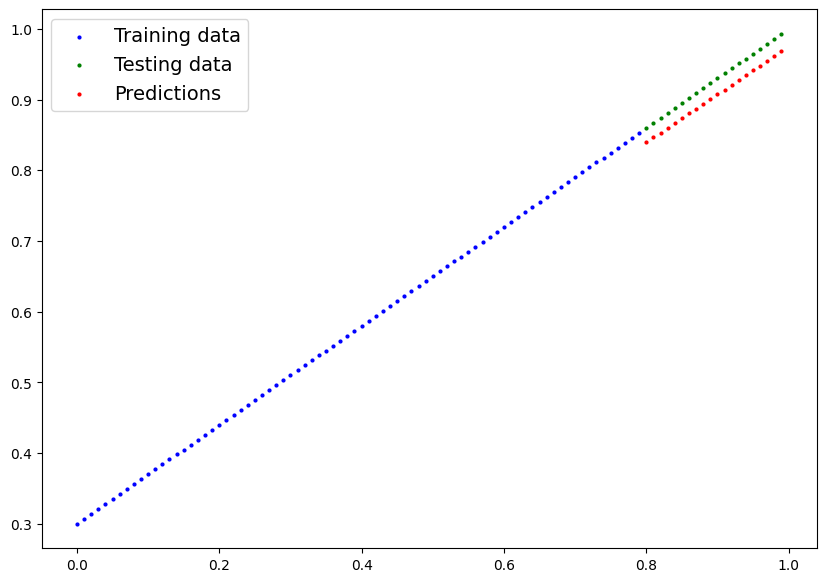

In [49]:
model_2.eval()
with torch.inference_mode():
  y_preds_new = model_2(X_test_regression)
plot_predictions(X_train_regression,
                 y_train_regression,
                 X_test_regression,
                 y_test_regression,
                 y_preds_new)

# 6. apply non-linearity

* what patterns could be drawn given an infinite amount of straight an non-straight lines

### 6.1 recreating non-linear data

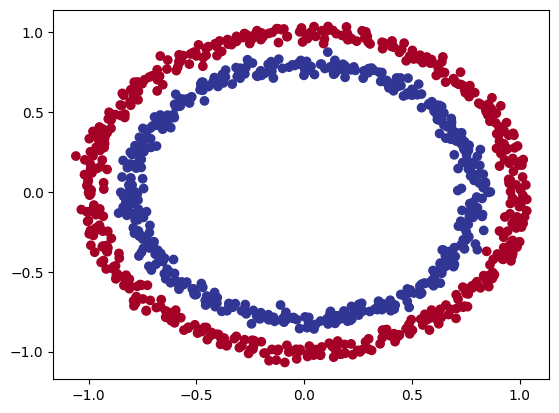

In [50]:
# make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

In [51]:
# convert data to tensors and train and test splits
import torch
from sklearn.model_selection import train_test_split

# turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

# 6.2 building model with non-lineraity

In [52]:
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [53]:
X_train.shape, y_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [54]:
model_3.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [55]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                         lr=0.1)

In [56]:
torch.manual_seed(42)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 1000

for epoch in range(epochs):
  model_3.train()

  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_preds, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                      y_pred=test_pred)

    if epoch % 100 == 0:
      print(f"Epoch: {epoch} Loss: {loss:.5f} Acc: {acc:.2f} | Test Loss: {test_loss:.5f} Test Acc: {test_acc:.2f}")




Epoch: 0 Loss: 0.69295 Acc: 50.00 | Test Loss: 0.81326 Test Acc: 100.00
Epoch: 100 Loss: 0.69115 Acc: 52.88 | Test Loss: 0.71248 Test Acc: 100.00
Epoch: 200 Loss: 0.68977 Acc: 53.37 | Test Loss: 0.70418 Test Acc: 100.00
Epoch: 300 Loss: 0.68795 Acc: 53.00 | Test Loss: 0.70278 Test Acc: 100.00
Epoch: 400 Loss: 0.68517 Acc: 52.75 | Test Loss: 0.70089 Test Acc: 100.00
Epoch: 500 Loss: 0.68102 Acc: 52.75 | Test Loss: 0.70089 Test Acc: 100.00
Epoch: 600 Loss: 0.67515 Acc: 54.50 | Test Loss: 0.70278 Test Acc: 100.00
Epoch: 700 Loss: 0.66659 Acc: 58.38 | Test Loss: 0.68899 Test Acc: 100.00
Epoch: 800 Loss: 0.65160 Acc: 64.00 | Test Loss: 0.65189 Test Acc: 100.00
Epoch: 900 Loss: 0.62362 Acc: 74.00 | Test Loss: 0.60460 Test Acc: 100.00


In [57]:
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

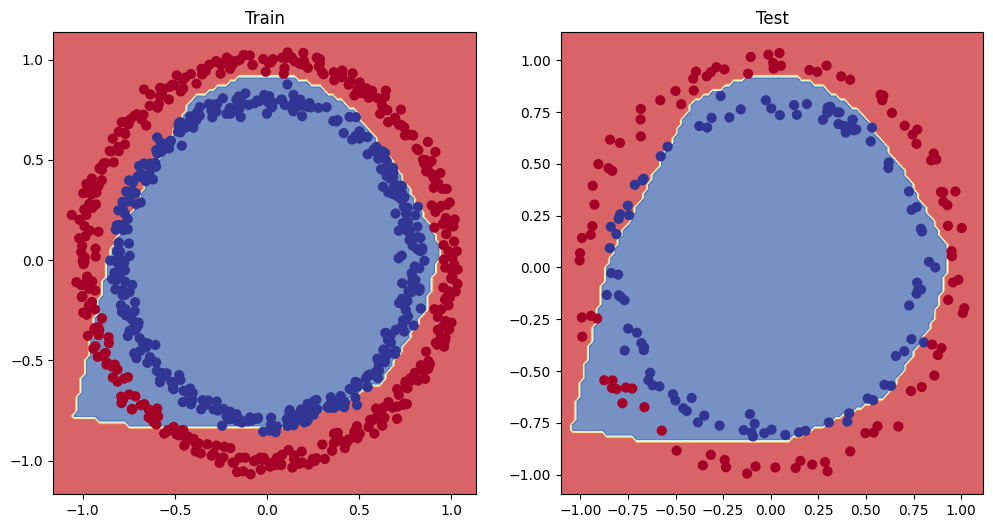

In [58]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_3, X_train, y_train) # no non-linearity
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_3, X_test, y_test) # has non_linearity

### 7. replication non-linear activation functions

neural networks, instead of telling the model what to learn it will be given the tools to figure out patterns in the data by itself

tools are the linear an dnon-linear finctions

In [59]:
# create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

torch.float32

In [60]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

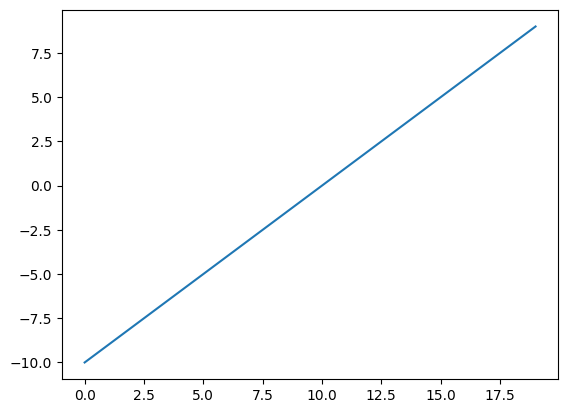

In [61]:
# visualize
plt.plot(A);

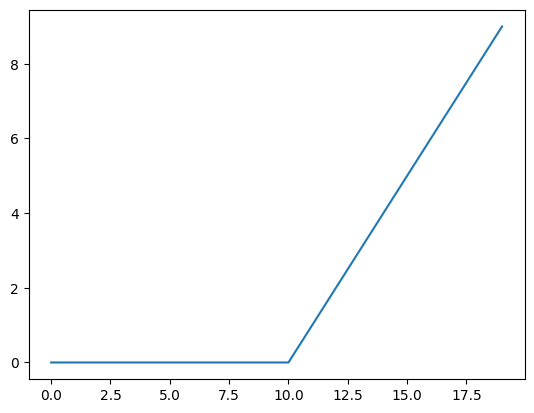

In [62]:
plt.plot(torch.relu(A));

In [63]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

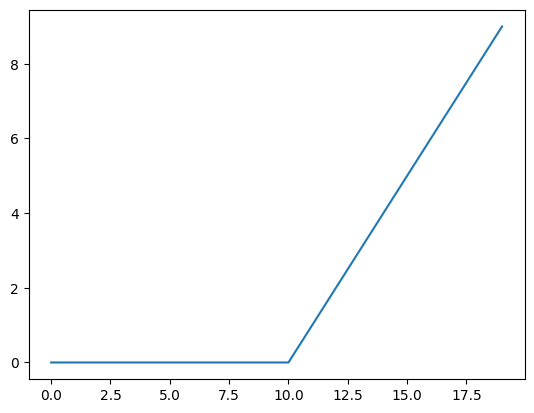

In [64]:
#plot ReLU activation function
plt.plot(relu(A));

In [65]:
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

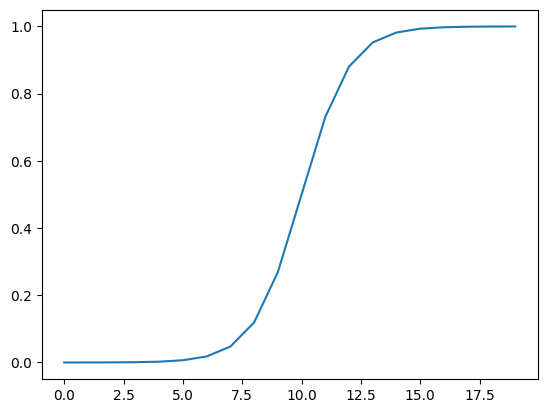

In [66]:
plt.plot(torch.sigmoid(A));

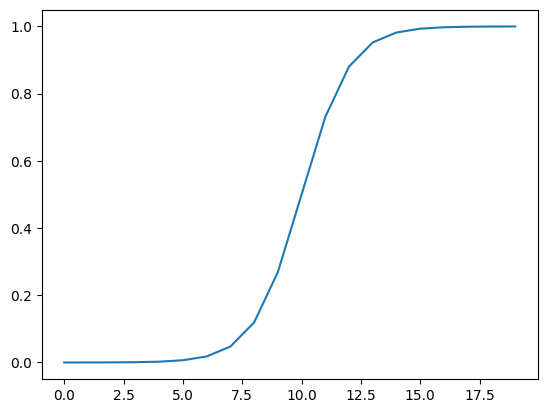

In [67]:
plt.plot(sigmoid(A));

In [68]:
def relu6(x):
  return torch.minimum(torch.maximum(torch.tensor(0), x), torch.tensor(6))

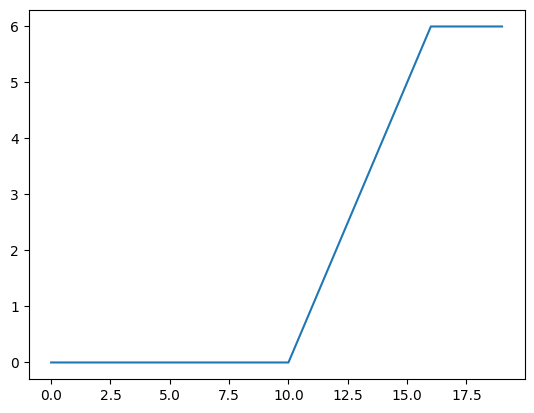

In [69]:
plt.plot(relu6(A));

In [70]:
def softmax(x):
  return torch.exp(x) / torch.sum((torch.exp(x)))

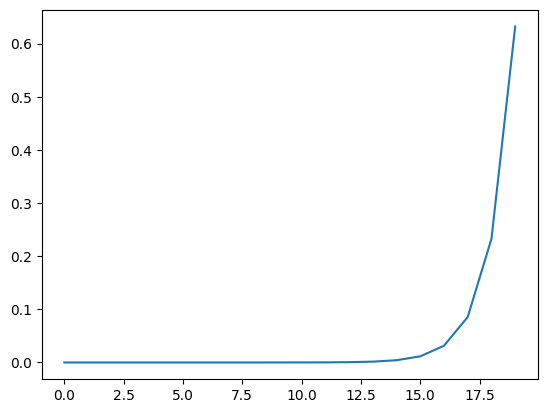

In [71]:
plt.plot(softmax(A));

### 8. putting it all together with multiclass classification

#### 8.1 creating toy multi-class dataset

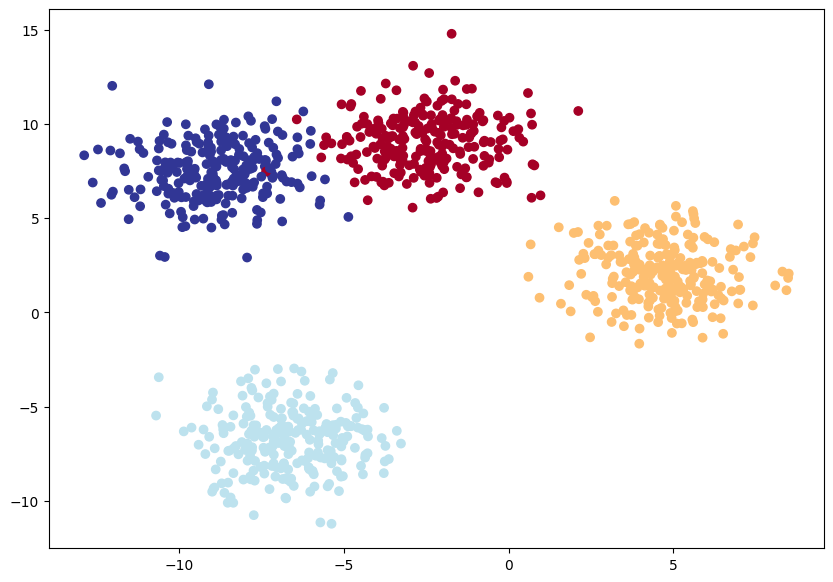

In [72]:
# import dependencies
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
# set the hyperparameters
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# create multiclass data
X_blob, y_blob, = make_blobs(n_samples=1000,
                             n_features=NUM_FEATURES,
                             centers=NUM_CLASSES,
                             cluster_std=1.5,
                             random_state=RANDOM_SEED)

# 2. turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)
# 4. plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu);

In [73]:
X_blob_train.shape, X_blob_test.shape, y_blob_train.shape, y_blob_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

### 8.2 building multi-class classification model

In [74]:
# create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [75]:
# build multi class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """initialize model

    args: in features (int): number of input features
          out features (int): number of output features
          hidden units (int): number of hidden units between layers

    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)
model_4


BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [76]:
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

In [77]:
# create loss function for multi class classification
loss_fn = nn.CrossEntropyLoss() # measures how wrong the models prediction are

# create optimizer
optimizer = torch.optim.SGD(params=model_4.parameters(), # updates model parameters and reduces the loss
                           lr=0.1)

### 8.4 getting prediction probabilities for multi class pytorch model

* need to convert the outputs (logits) to prediction probabilities to prediction labels

* logits (raw output) -> pred porbs (torch.softmax) -> pred labels (torch.argmax(pred_probs))

go from logits to pobablities (rows add up to 1 and and a proper percentual reference can be made in regards of which element has the highest probability) ***using the softmax function*** go to prediction labels which extracts the position of the highest value in a row by its row index ***using the argmax function***

In [78]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)
y_logits[:10] # 4 output features

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]])

In [79]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [80]:
# conveert logits outputs to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]])
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]])


In [81]:
torch.sum(y_pred_probs[0])

tensor(1.)

In [82]:
torch.max(y_pred_probs[0])

tensor(0.3244)

In [83]:
# convert prediction probablities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1])

In [84]:
# should line up with y_preds -> purpose of training
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

### 8.5 create training and testing loop for multi class pytorch model

In [85]:
y_blob_train.dtype

torch.int64

In [86]:
# fit multi class model to data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set number of epochs
epochs = 100

# put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# loop through the data
for epoch in range(epochs):
  model_4.train()

  y_logits = model_4(X_blob_train)

  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  # testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_pred)

  # print out
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f} | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}")

Epoch: 0 | Loss: 1.15883 | Acc: 40.38 | Test Loss: 1.07554 | Test Acc: 48.00
Epoch: 10 | Loss: 0.64476 | Acc: 96.75 | Test Loss: 0.66069 | Test Acc: 97.50
Epoch: 20 | Loss: 0.42535 | Acc: 98.50 | Test Loss: 0.43074 | Test Acc: 100.00
Epoch: 30 | Loss: 0.25294 | Acc: 99.12 | Test Loss: 0.24508 | Test Acc: 99.50
Epoch: 40 | Loss: 0.11232 | Acc: 99.25 | Test Loss: 0.10229 | Test Acc: 99.50
Epoch: 50 | Loss: 0.06627 | Acc: 99.25 | Test Loss: 0.05848 | Test Acc: 99.50
Epoch: 60 | Loss: 0.05068 | Acc: 99.25 | Test Loss: 0.04293 | Test Acc: 99.50
Epoch: 70 | Loss: 0.04300 | Acc: 99.25 | Test Loss: 0.03491 | Test Acc: 99.50
Epoch: 80 | Loss: 0.03836 | Acc: 99.25 | Test Loss: 0.02988 | Test Acc: 99.50
Epoch: 90 | Loss: 0.03525 | Acc: 99.25 | Test Loss: 0.02663 | Test Acc: 99.50


In [87]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)
y_logits[:10]

tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466],
        [-2.8211, -7.5767, -4.2944,  3.7944],
        [-3.0306, -3.3328,  2.7955, -2.1374],
        [ 3.3761, -4.0375, -6.8987, -3.5503],
        [-4.3620, -4.9904,  3.8123, -3.3814],
        [ 3.5012, -3.0281, -7.5401, -4.7064]])

In [88]:
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[1.3438e-03, 9.9865e-01, 1.2164e-06, 5.3854e-07],
        [4.9905e-03, 7.4740e-05, 1.0630e-03, 9.9387e-01],
        [1.3985e-03, 8.6060e-04, 9.9463e-01, 3.1074e-03],
        [4.7389e-03, 9.9483e-01, 3.1956e-04, 1.1353e-04],
        [9.9388e-01, 6.0966e-03, 2.4904e-06, 2.2378e-05],
        [1.3372e-03, 1.1504e-05, 3.0644e-04, 9.9834e-01],
        [2.9138e-03, 2.1537e-03, 9.8781e-01, 7.1181e-03],
        [9.9838e-01, 6.0198e-04, 3.4435e-05, 9.7989e-04],
        [2.8147e-04, 1.5016e-04, 9.9882e-01, 7.5044e-04],
        [9.9825e-01, 1.4575e-03, 1.5997e-05, 2.7210e-04]])

In [89]:
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

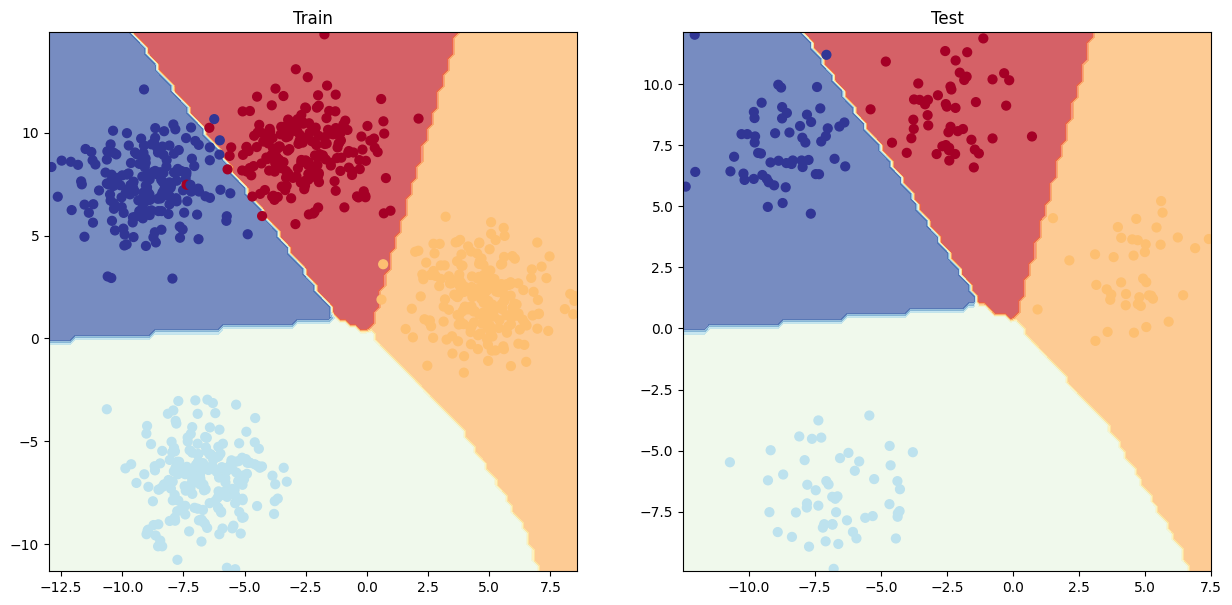

In [90]:
# visualize
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

### 9. Classification metrics for additional model evaluation - further evaluation

* Accuracy - out of 100 how many does the model get right
* Precision
* Recall
https://medium.com/data-science/beyond-accuracy-precision-and-recall-3da06bea9f6c
* F1 Score
* Confusion matrix
* Classification report

In [91]:
! pip install torchmetrics

In [92]:
y_blob_test, y_preds

(tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
         2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
         0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
         3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
         1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
         2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
         2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
         2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
         1, 3, 2, 0, 3, 1, 2, 1]),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
         2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
         0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
         3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3,

In [93]:
from torchmetrics import Accuracy

# setup metrics
torchmetric_accuracy = Accuracy(task='multiclass', num_classes=NUM_CLASSES)

torchmetric_accuracy(y_preds, y_blob_test)



tensor(0.9950)